# COMPEX-EC
Clouds over cOMPlEX environment - EarthCARE [COMPEX-EC](https://blog.uni-koeln.de/awares/category/campaigns-conf/compex-ec/) - Polar 5 EarthCARE validation campaign out of Kiruna (2.-16.4.2025).

### Detailed flight logs
| RF# | Date | Description | TO | TD | HH | EC | Track (jpg) | Track (KML) | Flight report |
|:---:|:----:|:------------|:--:|:--:|:--:|:--:|:-----------:|:-----------:|:------------:|
| RF00 | 26.3.2025 | EarthCARE during test flight in Bremen | 13:21 | 14:32 | 1:11 | 13:58 | [jpg](../img/COMPEX-EC_P5_RF00.jpg) | [KML](../data/COMPEX-EC_P5_RF00_track.kml) |  |
| RF01 | 4.4.2025 | EarthCARE - MSI track and direct underflight | 11:03 | 16:03 | 5:00 | 13:51 | [jpg](../img/COMPEX-EC_P5_RF01.jpg) | [KML](../data/COMPEX-EC_P5_RF01_track.kml) | [RF](../documents/COMPEX-EC_flight_report_20250404_RF01.pdf) |
| RF02 | 6.4.2025 | EarthCARE - MSI track and direct underflight  | 12:20 | 16:22 | 4:02 | 13:40 | [jpg](../img/COMPEX-EC_P5_RF02.jpg) | [KML](../data/COMPEX-EC_P5_RF02_track.kml) | [RF](../documents/COMPEX-EC_flight_report_20250406_RF02.pdf) |
| RF03 | 7.4.2025 | EarthCARE - MSI track and direct underflight  | 12:06 | 16:00 | 3:54 | 14:20 | [jpg](../img/COMPEX-EC_P5_RF03.jpg) | [KML](../data/COMPEX-EC_P5_RF03_track.kml) | [RF](../documents/COMPEX-EC_flight_report_20250407_RF03.pdf) |
| RF04 | 8.4.2025 | EarthCARE - back and forth| 11:59 | 15:59 | 4:00 | 13:30 | [jpg](../img/COMPEX-EC_P5_RF04.jpg) | [KML](../data/COMPEX-EC_P5_RF04_track.kml) | [RF](../documents/COMPEX-EC_flight_report_20250408_RF04.pdf) |
| RF05 | 11.4.2025 | EarthCARE - back and forth | 12:05 | 15:28 | 3:23 | 13:58 | [jpg](../img/COMPEX-EC_P5_RF05.jpg) | [KML](../data/COMPEX-EC_P5_RF05_track.kml) | [RF](../documents/COMPEX-EC_flight_report_20250411_RF05.pdf) |
| RF06 | 13.4.2025 | EarthCARE - back and forth | 10:37 | 15:41 | 5:04 | 13:47 | [jpg](../img/COMPEX-EC_P5_RF06.jpg) | [KML](../data/COMPEX-EC_P5_RF06_track.kml) | [RF](../documents/COMPEX-EC_flight_report_20250413_RF06.pdf) |
| RF07 | 15.4.2025 | EarthCARE - back and forth | 10:54 | 15:44 | 4:50 | 13:35 | [jpg](../img/COMPEX-EC_P5_RF07.jpg) | [KML](../data/COMPEX-EC_P5_RF07_track.kml) | [RF](../documents/COMPEX-EC_flight_report_20250415_RF07.pdf) |

```{figure} ../img/all_compex-ec_tracks.png
---
height: 400px
name: directive-fig
alt: COMPEX-EC flight tracks
---
Flight tracks of the COMPEX-EC campaign.
```


In [ ]:
%matplotlib inline
import ac3airborne
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
plt.style.use("../mplstyle/book")

# load intake catalog and flight segments
cat = ac3airborne.get_intake_catalog()
meta = ac3airborne.get_flight_segments()

ancillary = ['AMSR2_SIC']

def data_availability(mission, platform):
    """
    Plot data availability matrix
    """
    
    # store data availability in a matrix
    data_availability = np.zeros(shape=(len(list(cat[mission][platform])),
                                        len(list(meta[mission][platform]))))
    for i, dataset in enumerate(list(cat[mission][platform])):
        data_availability[i, :] = np.isin(list(meta[mission][platform]), 
                                          list(cat[mission][platform][dataset]))

    # plot data availability
    yscale = data_availability.shape[1]
    fig, ax = plt.subplots(1, 1, figsize=(5, 2+0.4*yscale))
    
    ax.pcolormesh(range(data_availability.shape[0]), 
                  range(data_availability.shape[1]), 
                  data_availability.T, 
                  shading='nearest',
                  vmin=0, 
                  vmax=1, 
                  cmap='RdYlGn', 
                  edgecolors='#eeeeee')

    ax.set_xticks(range(data_availability.shape[0]))
    ax.set_yticks(range(data_availability.shape[1]))

    xlabels = []
    for ds_name in list(cat[mission][platform]):
        if ds_name in ancillary:
            ds_name += '\n(ancillary)'
        xlabels.append(ds_name)

    ax.set_xticklabels(xlabels, rotation=90)
    y_labels = [flight_id+', '+flight['date'].strftime('%Y-%m-%d') 
                for flight_id, flight in meta[mission][platform].items()]
    ax.set_yticklabels(y_labels)

    ax.tick_params(labeltop=True)
    ax.invert_yaxis()

    available = mpatches.Patch(color='green', label='Data available')
    not_flown = mpatches.Patch(color='red', label='Data missing or\ninstrument failed')

    ax.legend(handles=[available, not_flown], ncol=1,
              bbox_to_anchor=(0, 1.01), loc='lower right')

    plt.show()

## Polar 5

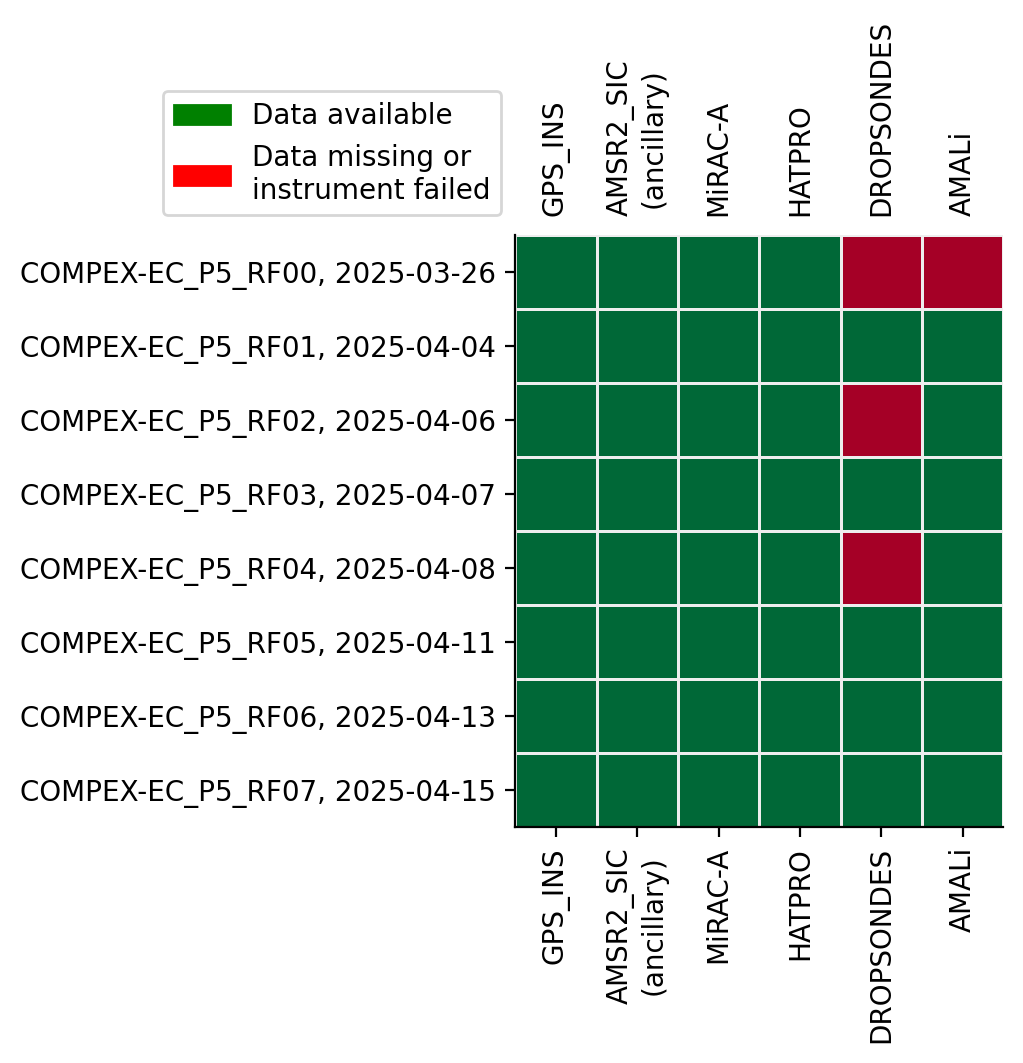

In [ ]:
data_availability(mission='COMPEX-EC', platform='P5')